In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import xarray as xr

from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
rpn_file = '/data/dlatorne/gemlam//gemlam_y2014m11d05_018.nc'
gem_file = '/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m11d05.nc'

In [3]:
rpn_data = xr.open_dataset(rpn_file)
rpn_data.PRATE_surface

<xarray.DataArray 'PRATE_surface' (time_counter: 1, y: 266, x: 256)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [4.684553e-04, 4.437752e-04, ..., 5.355105e-06, 2.561137e-06],
        [4.509930e-04, 4.703179e-04, ..., 9.313226e-06, 3.492460e-06]]],
      dtype=float32)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2014-11-05T18:00:00
Dimensions without coordinates: y, x
Attributes:
    level:          surface
    long_name:      Precipitation Rate
    standard_name:  precipitation_flux
    units:          kg/m^2/s

In [4]:
ops_data = xr.open_dataset(gem_file)
ops_data

<xarray.Dataset>
Dimensions:       (time_counter: 24, x: 256, y: 266)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2014-11-05 ... 2014-11-05T23:00:00
  * x             (x) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05
  * y             (y) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
Data variables:
    atmpres       (time_counter, y, x) float32 ...
    nav_lat       (y, x) float64 ...
    nav_lon       (y, x) float64 ...
    precip        (time_counter, y, x) float32 ...
    qair          (time_counter, y, x) float32 ...
    solar         (time_counter, y, x) float32 ...
    tair          (time_counter, y, x) float32 ...
    therm_rad     (time_counter, y, x) float32 ...
    u_wind        (time_counter, y, x) float32 ...
    v_wind        (time_counter, y, x) float32 ...
Attributes:
    Conventions:          CF-1.0
    GRIB2_grid_template:  20
    NCO:                  4.4.2
    History:              Thu Dec 31 12:21:07 2015: ncatted -O -a tim

## Interpolation Code

In [5]:
rpn_lon = np.array(rpn_data['nav_lon']).flatten()
rpn_lat = np.array(rpn_data['nav_lat']).flatten()
points = np.array( (rpn_lon, rpn_lat)).T
print (points.shape)

(68096, 2)


In [6]:
def interpolate_rpn_to_ops(field, points, opsdata):
    xnew = opsdata['nav_lon'][:]
    ynew = opsdata['nav_lat'][:]
    flat_field = np.array(field).flatten()
    rpn_on_ops_field = interpolate.griddata(points, flat_field, (xnew, ynew))
    return rpn_on_ops_field

# Atmospheric Pressure

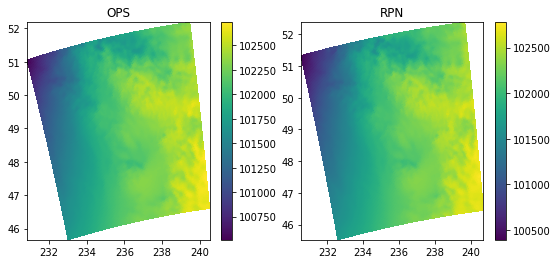

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['atmpres'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['atmpres'][0])
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);

In [8]:
rpn_pressure_on_ops = interpolate_rpn_to_ops(rpn_data['atmpres'][0],
                                            points, ops_data)

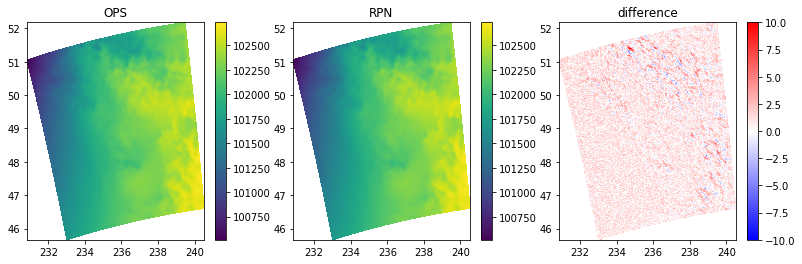

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(13.5, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['atmpres'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_pressure_on_ops)
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);
colour = axs[2].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_pressure_on_ops - ops_data['atmpres'][18],
                          vmax=10, vmin=-10, cmap='bwr')
axs[2].set_title('difference')
fig.colorbar(colour, ax=axs[2]);

# Air Temperature

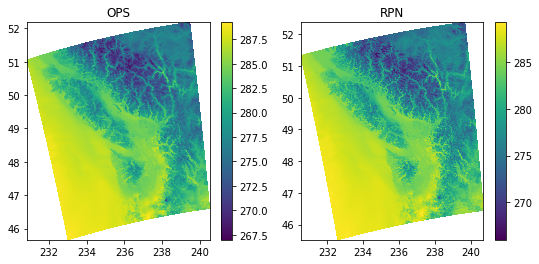

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['tair'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['tair'][0])
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);

In [11]:
rpn_tair_on_ops = interpolate_rpn_to_ops(rpn_data['tair'][0],
                                            points, ops_data)

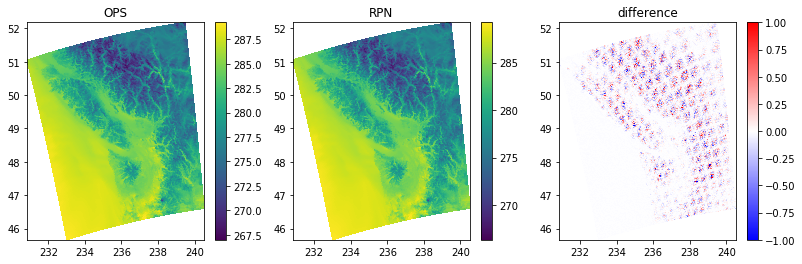

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(13.5, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['tair'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_tair_on_ops)
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);
colour = axs[2].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_tair_on_ops - ops_data['tair'][18],
                          vmax=1, vmin=-1, cmap='bwr')
axs[2].set_title('difference')
fig.colorbar(colour, ax=axs[2]);

# UWind

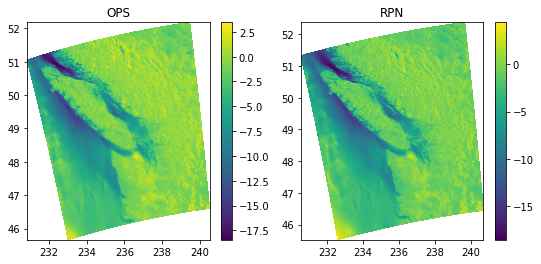

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['u_wind'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['u_wind'][0])
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);

In [14]:
rpn_uwind_on_ops = interpolate_rpn_to_ops(rpn_data['u_wind'][0],
                                            points, ops_data)

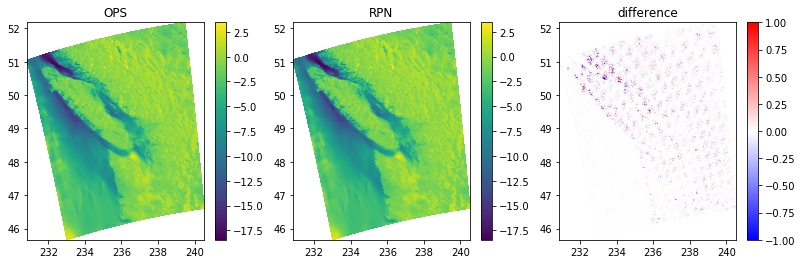

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(13.5, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['u_wind'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_uwind_on_ops)
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);
colour = axs[2].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_uwind_on_ops - ops_data['u_wind'][18],
                          vmax=1, vmin=-1, cmap='bwr')
axs[2].set_title('difference')
fig.colorbar(colour, ax=axs[2]);

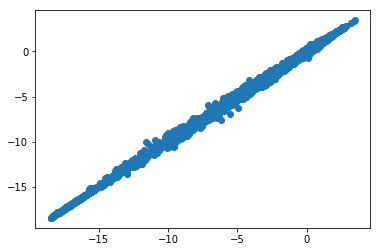

In [16]:
plt.scatter(ops_data['u_wind'][18], rpn_uwind_on_ops);

## v wind

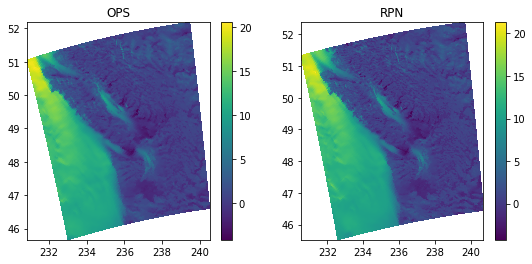

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['v_wind'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['v_wind'][0])
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);

In [18]:
rpn_vwind_on_ops = interpolate_rpn_to_ops(rpn_data['v_wind'][0],
                                            points, ops_data)

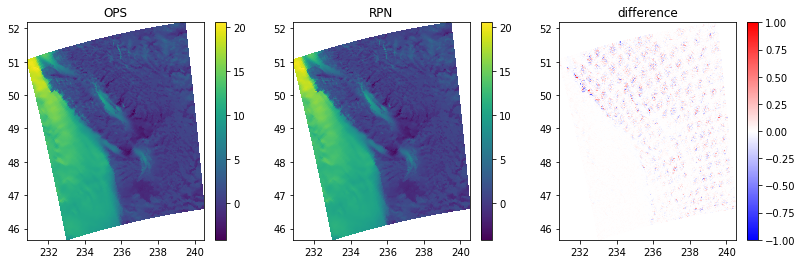

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(13.5, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['v_wind'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_vwind_on_ops)
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);
colour = axs[2].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_vwind_on_ops - ops_data['v_wind'][18],
                          vmax=1, vmin=-1, cmap='bwr')
axs[2].set_title('difference')
fig.colorbar(colour, ax=axs[2]);

# Humidity (specific)

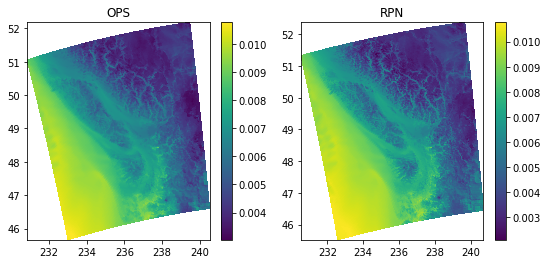

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['qair'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['qair'][0])
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);

In [21]:
rpn_qair_on_ops = interpolate_rpn_to_ops(rpn_data['qair'][0],
                                            points, ops_data)

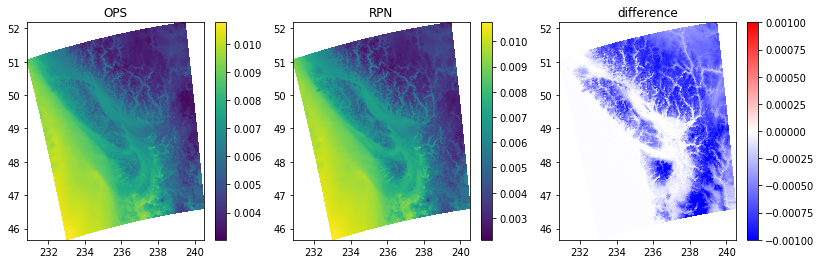

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(13.5, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['qair'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_qair_on_ops)
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);
colour = axs[2].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_qair_on_ops - ops_data['qair'][18],
                          vmax=0.001, vmin=-0.001, cmap='bwr')
axs[2].set_title('difference')
fig.colorbar(colour, ax=axs[2]);

In [23]:
watermask = [rpn_qair_on_ops - ops_data['qair'][18] > -0.0001]

In [24]:
watermask = np.array(watermask)

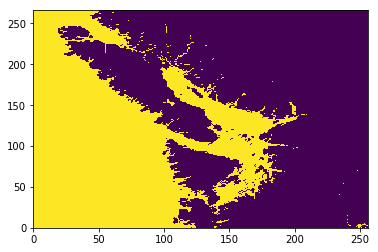

In [25]:
plt.pcolormesh(watermask[0])

# Humidity (Relative)

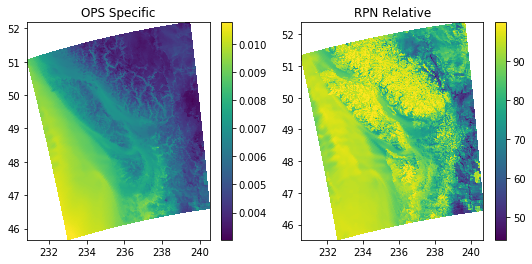

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['qair'][18])
axs[0].set_title('OPS Specific')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['RH_2maboveground'][0])
axs[1].set_title('RPN Relative')
fig.colorbar(colour, ax=axs[1]);

In [27]:
rpn_rhumid_on_ops = interpolate_rpn_to_ops(rpn_data['RH_2maboveground'][0],
                                            points, ops_data)

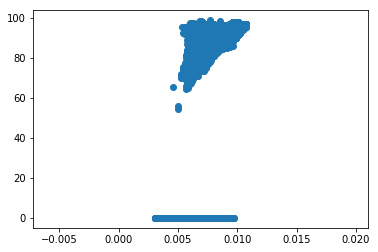

In [28]:
plt.scatter(ops_data['qair'][18], rpn_rhumid_on_ops*watermask[0])

# Thermal Radiation

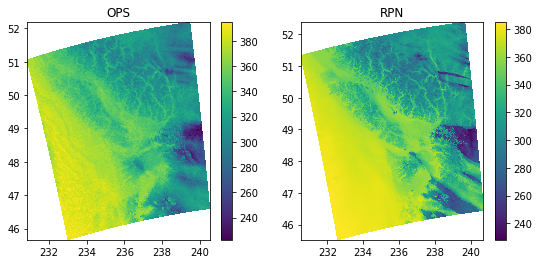

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['therm_rad'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['therm_rad'][0])
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);

In [30]:
rpn_thermrad_on_ops = interpolate_rpn_to_ops(rpn_data['therm_rad'][0],
                                            points, ops_data)

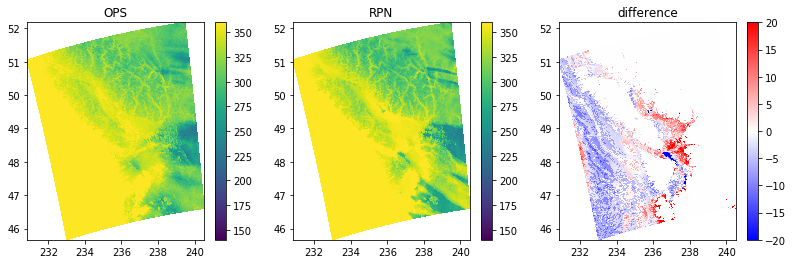

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(13.5, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['therm_rad'][18], vmax=360, vmin=140)
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_thermrad_on_ops, vmax=360, vmin=140)
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);
colour = axs[2].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  (rpn_thermrad_on_ops - ops_data['therm_rad'][18])*
                           watermask[0],
                          vmax=20, vmin=-20, cmap='bwr')
axs[2].set_title('difference')
fig.colorbar(colour, ax=axs[2]);

(250, 390)

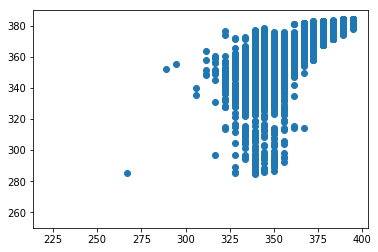

In [32]:
plt.scatter(ops_data['therm_rad'][18], rpn_thermrad_on_ops*watermask[0])
plt.ylim(250, 390)

# Precipitation Rate

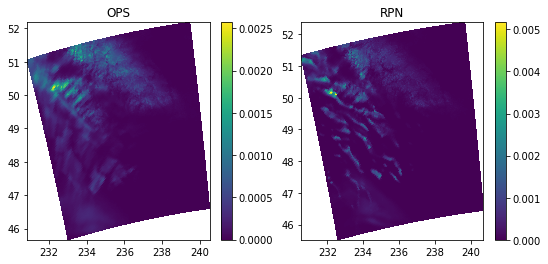

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['precip'][18]) # in kg m2/s 
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['PRATE_surface'][0])   # in kg m2/s
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);

In [50]:
rpn_precipr_on_ops = interpolate_rpn_to_ops(rpn_data['PRATE_surface'][0],
                                            points, ops_data)

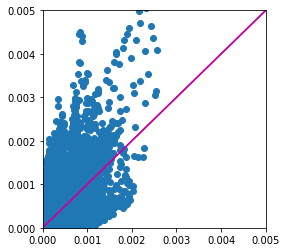

In [51]:
fig, ax =plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(ops_data['precip'][18], rpn_precipr_on_ops)
ax.plot([0, 5e-3], [0, 5e-3], '-r')
ax.plot([0, 5e-3], [0, 5e-3], '-m')
ax.set_xlim(0, 5e-3);
ax.set_ylim(0, 5e-3);


<xarray.DataArray 'precip' ()>
array(0.000134, dtype=float32)
Coordinates:
    time_counter  datetime64[ns] 2014-11-05T17:00:00
<xarray.DataArray 'precip' ()>
array(0.000141, dtype=float32)
Coordinates:
    time_counter  datetime64[ns] 2014-11-05T18:00:00
<xarray.DataArray 'precip' ()>
array(0.000121, dtype=float32)
Coordinates:
    time_counter  datetime64[ns] 2014-11-05T19:00:00
0.0001452064202724253
<xarray.DataArray 'PRATE_surface' ()>
array(0.000145, dtype=float32)
Coordinates:
    time_counter  datetime64[ns] 2014-11-05T18:00:00


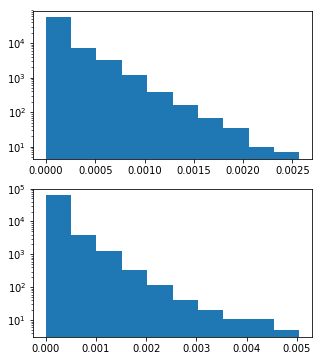

In [53]:
fig, axs = plt.subplots(2, 1, figsize=(5, 6))
axs[0].hist(np.array(ops_data['precip'][18]).flatten(), log=True);
axs[1].hist(np.array(rpn_precipr_on_ops).flatten(), log=True)
print((ops_data['precip'][17]).mean())
print((ops_data['precip'][18]).mean())
print((ops_data['precip'][19]).mean())
print(rpn_precipr_on_ops.mean())
print(rpn_data['PRATE_surface'][0].mean())

In [37]:
rpn_data['PRATE_surface']

<xarray.DataArray 'PRATE_surface' (time_counter: 1, y: 266, x: 256)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [4.684553e-04, 4.437752e-04, ..., 5.355105e-06, 2.561137e-06],
        [4.509930e-04, 4.703179e-04, ..., 9.313226e-06, 3.492460e-06]]],
      dtype=float32)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2014-11-05T18:00:00
Dimensions without coordinates: y, x
Attributes:
    level:          surface
    long_name:      Precipitation Rate
    standard_name:  precipitation_flux
    units:          kg/m^2/s

In [38]:
ops_data['precip']

<xarray.DataArray 'precip' (time_counter: 24, y: 266, x: 256)>
[1634304 values with dtype=float32]
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2014-11-05 ... 2014-11-05T23:00:00
  * x             (x) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05
  * y             (y) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
Attributes:
    short_name:   APCP_surface
    long_name:    Total Precipitation
    level:        surface
    units:        kg/m^2
    coordinates:  longitude latitude

# Hourly Precipitation

ncdiff -v precip /data/dlatorne/tmp-rpn-to-gem-lam/gemlam_y2014m11d03_017.nc /data/dlatorne/tmp-rpn-to-gem-lam/gemlam_y2014m11d03_018.nc myprecip.nc

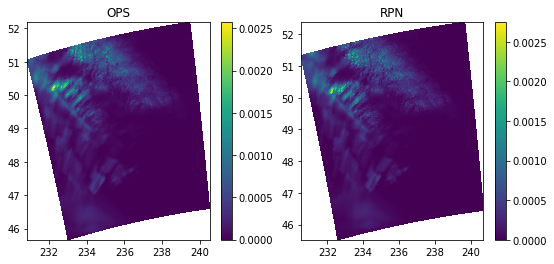

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['precip'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['precip'][0])
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);

In [40]:
rpn_preipi_on_ops = interpolate_rpn_to_ops(rpn_data['precip'][0],
                                            points, ops_data)

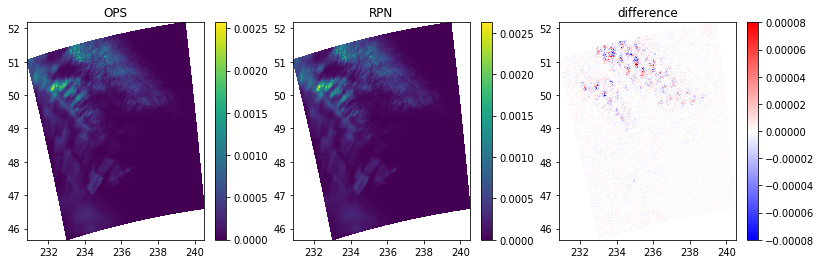

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(13.5, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['precip'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_preipi_on_ops)
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);
colour = axs[2].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  (rpn_preipi_on_ops - ops_data['precip'][18]),
                          cmap='bwr', vmax=8e-5, vmin=-8e-5)
axs[2].set_title('difference')
fig.colorbar(colour, ax=axs[2]);

# Solar

ncra -v solar /data/dlatorne/tmp-rpn-to-gem-lam/gemlam_y2014m11d03_017.nc /data/dlatorne/tmp-rpn-to-gem-lam/gemlam_y2014m11d03_018.nc mysolar.nc

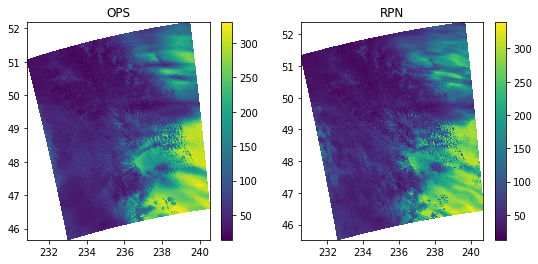

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['solar'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(rpn_data['nav_lon'], rpn_data['nav_lat'], 
                  rpn_data['solar'][0])
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);

In [43]:
rpn_solar_on_ops = interpolate_rpn_to_ops(rpn_data['solar'][0],
                                            points, ops_data)

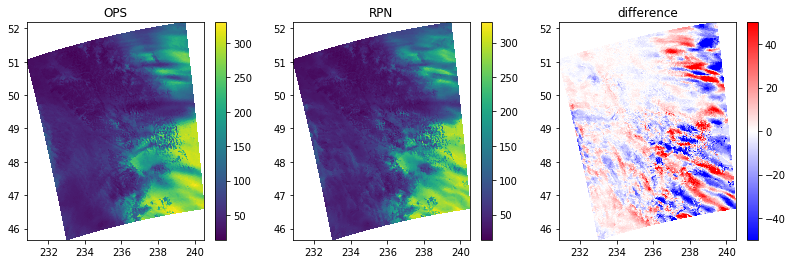

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(13.5, 4))
colour = axs[0].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  ops_data['solar'][18])
axs[0].set_title('OPS')
fig.colorbar(colour, ax=axs[0]);
colour = axs[1].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  rpn_solar_on_ops)
axs[1].set_title('RPN')
fig.colorbar(colour, ax=axs[1]);
colour = axs[2].pcolormesh(ops_data['nav_lon'], ops_data['nav_lat'], 
                  (rpn_solar_on_ops - ops_data['solar'][18]),
                          vmax=50, vmin=-50, cmap='bwr')
axs[2].set_title('difference')
fig.colorbar(colour, ax=axs[2]);

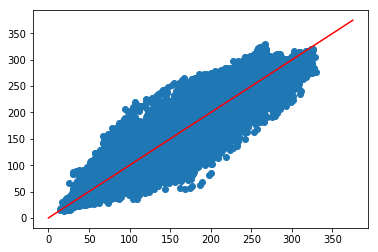

In [45]:
plt.scatter(np.array(ops_data['solar'][18]).flatten(), np.array(rpn_solar_on_ops).flatten());
plt.plot([0, 375], [0, 375], 'r-');

In [46]:
rpn_data['solar']

<xarray.DataArray 'solar' (time_counter: 1, y: 266, x: 256)>
array([[[ 72.11792 ,  73.809326, ..., 285.71558 , 279.20386 ],
        [ 69.196045,  72.21167 , ..., 276.14917 , 271.0437  ],
        ...,
        [ 22.672607,  22.739014, ...,  51.766357,  58.114014],
        [ 23.071045,  22.809326, ...,  49.74292 ,  51.844482]]], dtype=float32)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2014-11-05T18:00:00
Dimensions without coordinates: y, x
Attributes:
    level:          surface
    long_name:      Downward Short-Wave Radiation Flux
    standard_name:  net_downward_shortwave_flux_in_air
    units:          W/m^2
    cell_methods:   time_counter: mean

In [47]:
currfile = xr.open_dataset('/data/dlatorne/tmp-rpn-to-gem-lam/gemlam_y2014m11d01_018.nc')
prevfile = xr.open_dataset('/data/dlatorne/tmp-rpn-to-gem-lam/gemlam_y2014m11d01_017.nc')

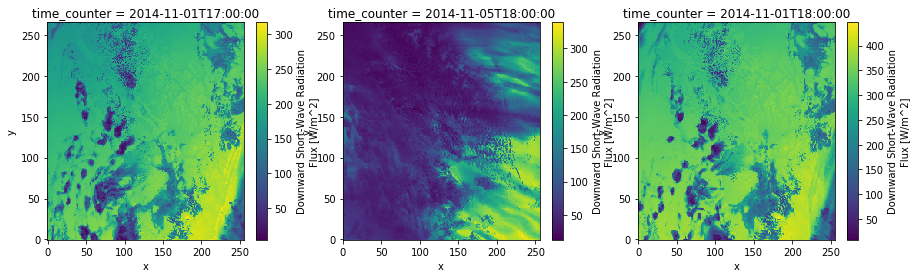

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
prevfile.solar.plot(ax=axs[0])
rpn_data.solar.plot(ax=axs[1])
currfile.solar.plot(ax=axs[2]);